# Spam Email Classification

In [1]:
# Importing an ipynb file from another ipynb file
!pip install ipynb

# Importing functions from another jupyter notebook
!pip install nbimporter

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import nbimporter
import spambase_dataset_loader_nb
import spambase_model_helper_nb

## Data Preparation:

### Load the datasets:

In [3]:
loader = spambase_dataset_loader_nb.SpambaseDatasetLoader()

init Loader notebook


In [4]:
help(loader.load_dataset)

Help on method load_dataset in module spambase_dataset_loader_nb:

load_dataset(url='https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data') method of spambase_dataset_loader_nb.SpambaseDatasetLoader instance
    (string) --> None
    
    This function retrieves the spambase.data from University of California Irvine (UCI) - Dataset Repository
    and save into two files:
    
    1. spambase_all.csv - The CSV file that contain all the rows from spambase.data.
    2. spambase_balance.csv - The CSV file that rows balance between spam and not spam records.



In [5]:
loader.load_dataset()

Loading dataset.
Loading spambase_all.csv completed.
Loading spambase_balance.csv completed.


In [6]:
spambase_all = loader.get_full_dataset()

get_full_dataset


### Data Exploration

#### Explore the data using info() and describe() and head()

In [7]:
spambase_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   target_spam_nonspam         4601 non-null   int64  
 1   word_freq_make              4601 non-null   float64
 2   word_freq_address           4601 non-null   float64
 3   word_freq_all               4601 non-null   float64
 4   word_freq_3d                4601 non-null   float64
 5   word_freq_our               4601 non-null   float64
 6   word_freq_over              4601 non-null   float64
 7   word_freq_remove            4601 non-null   float64
 8   word_freq_internet          4601 non-null   float64
 9   word_freq_order             4601 non-null   float64
 10  word_freq_mail              4601 non-null   float64
 11  word_freq_receive           4601 non-null   float64
 12  word_freq_will              4601 non-null   float64
 13  word_freq_people            4601 

In [8]:
spambase_all.describe()

,target_spam_nonspam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.394045,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.488698,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,1.000000,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,1.000000,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [9]:
spambase_all.head(5)

,target_spam_nonspam,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


#### Check for null values.

<AxesSubplot:>

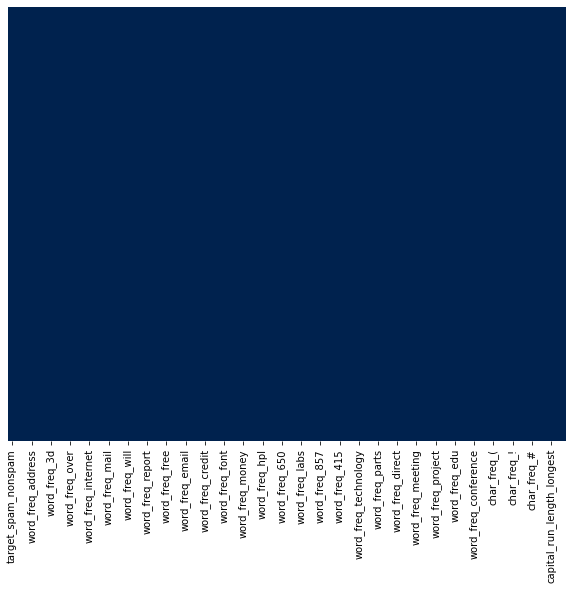

In [10]:
plt.figure(figsize=(10, 8))

ax = plt.axes()
sns.heatmap(spambase_all.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="cividis")


#### Check for na

In [11]:
spambase_all.isna().any()

target_spam_nonspam           False
word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george            

#### Check for data imbalance

[Text(0.5, 0, 'Spam or not')]

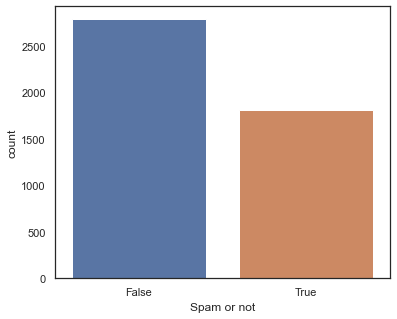

In [12]:
sns.set(rc={"figure.figsize":(6, 5)})
sns.set_style('white')

spambase_all_exp = spambase_all.copy()
spambase_all_exp["target_spam_nonspam"] = spambase_all_exp["target_spam_nonspam"].astype(bool)

ax = sns.countplot(x='target_spam_nonspam', data=spambase_all_exp) 
ax.set(xlabel='Spam or not')

#### Explore for Correlations
The large number of features makes it difficult to determine the correlations.

<AxesSubplot:>

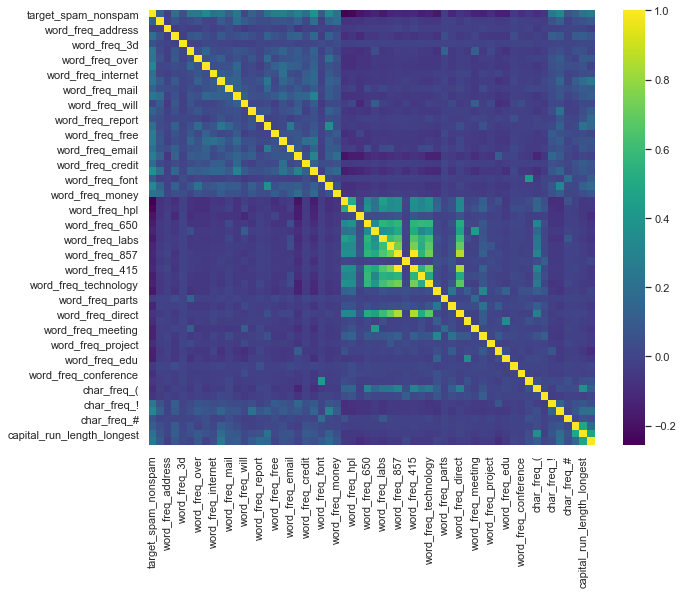

In [13]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.heatmap(spambase_all_exp.corr(), cmap='viridis')

### Challenges
* Imbalance Binary Classification
* Large number of features

### Solutions

#### Pandas Undersampling for Imbalanced Binary Classification

In [14]:
spam = spambase_all[spambase_all['target_spam_nonspam']==1]
non_spam = spambase_all[spambase_all['target_spam_nonspam']==0]
non_spam = non_spam.sample(n=len(spam), random_state=101)
spambase_balance = pd.concat([spam, non_spam],axis=0)  

# an alternative is simply use the loader.get_balance_dataset()
# since SpambaseDatasetLoader already handled the undersampling during load.

spambase_balance = loader.get_balance_dataset()

get_balance_data


[Text(0.5, 0, 'Spam or not')]

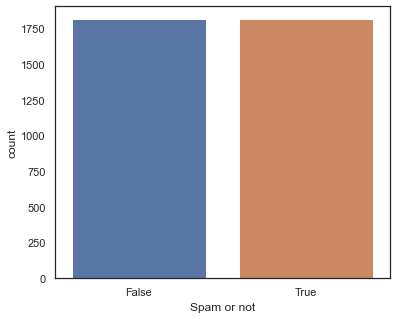

In [15]:
spambase_balance_exp = spambase_balance.copy()
spambase_balance_exp["target_spam_nonspam"] = spambase_balance_exp["target_spam_nonspam"].astype(bool)

sns.set(rc={"figure.figsize":(6, 5)})
sns.set_style('white')
ax = sns.countplot(x='target_spam_nonspam', data=spambase_balance_exp) 
ax.set(xlabel='Spam or not')

#### Feature Selection using P value

In [16]:
help(loader.perform_feature_selection)

Help on method perform_feature_selection in module spambase_dataset_loader_nb:

perform_feature_selection(data, threshold=0.05) method of spambase_dataset_loader_nb.SpambaseDatasetLoader instance
    (DataFrame, float) --> Dataframe
    
    
    This function performs feature selection using backward elimination technique.        
            
    Parameters
    ----------
    data: Dataframe that will be use in feature selection.
    
    threshold: If the p-value is higher than the threshold, we discard the combinations of features.
    
    Returns
    ----------        
    DataFrame : The DataFrame without after performing feature selection.



In [17]:
result = loader.perform_feature_selection(data=spambase_balance, threshold=0.05)

The shape before feature selection: (3626, 58)
The shape after feature selection: (3626, 37)


In [18]:
# defining the dependent and independent variables
X = result[0]
y = result[1]

## Model

### Split the data

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

print('The X_train: {}, y_train shape: {}'.format(X_train.shape, y_train.shape))
print('The X_test:  {}, y_test  shape: {}'.format(X_test.shape, y_test.shape))

# create a backup for later use.
X_train_bak = X_train.copy()
X_test_bak = X_test.copy()
y_train_bak = y_train.copy()
y_test_bak = y_test.copy()

The X_train: (2900, 37), y_train shape: (2900, 1)
The X_test:  (726, 37), y_test  shape: (726, 1)


### Statsmodels
The study introduced a model helper for running the test.
For the initial run with "Balance dataset with feature selection", the test was manually conducted to show the steps how the test is performed. However, the succeeding test will use the model helper so there is no need to repeat the code.

In [20]:
model_helper = spambase_model_helper_nb.SpambaseModelHelper()

init Model Helper notebook


In [21]:
help(model_helper.run_statsmodels_logit)

Help on method run_statsmodels_logit in module spambase_model_helper_nb:

run_statsmodels_logit(data, is_feature_selection=False, verbose=False) method of spambase_model_helper_nb.SpambaseModelHelper instance
    This function run logistic regression based from stats models.
    
    (DataFrame, boolean, boolean) --> DataFrame
    
    Parameters
    ----------
    data: Dataframe that will be use in running the model.
    
    is_feature_selection: True to run feature selection otherwise False.
    verbose: True to display statsmodels summary, confusion matrix and its heatmap otherwise false.
    
    Returns
    ----------        
    DataFrame : The DataFrame of statsmodels scores.



#### Balance dataset with feature selection

In [22]:
import statsmodels.api as sm

# building the model and fit the model using the training data
statsmodels_lr = sm.Logit(y_train, X_train).fit()

print(statsmodels_lr.summary())

Optimization terminated successfully.
         Current function value: 0.281660
         Iterations 12
                            Logit Regression Results                           
Dep. Variable:     target_spam_nonspam   No. Observations:                 2900
Model:                           Logit   Df Residuals:                     2863
Method:                            MLE   Df Model:                           36
Date:                 Wed, 26 Jul 2023   Pseudo R-squ.:                  0.5936
Time:                         23:48:40   Log-Likelihood:                -816.81
converged:                        True   LL-Null:                       -2010.1
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
word_freq_make                -0.7245      0.243     -2.987      0.

In [23]:
# performing predictions on the test dataset
yhat = statsmodels_lr.predict(X_test)

y_pred_statsmodels = list(map(round, yhat))

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_statsmodels) 
print('Confusion Matrix')
print(cf_matrix)

Confusion Matrix
[[325  42]
 [ 25 334]]


<AxesSubplot:>

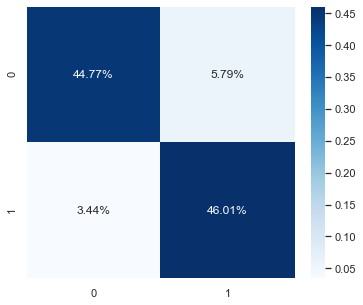

In [24]:
sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [25]:
TP = cf_matrix[0][0]
TN = cf_matrix[1][1]
FP = cf_matrix[0][1]
FN = cf_matrix[1][0]

print('Confusion Matrix result - TP: {}, TN:{}, FP:{}, FN: {}'
      .format(TP, TN, FP, FN))

acc = (TP + TN) / np.sum(cf_matrix)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = (2 * (precision * recall)) / (precision + recall)

statsmodels_scores_df = pd.DataFrame([[acc, precision, recall, f1_score]], 
        ['Score'], ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
statsmodels_scores_df

Confusion Matrix result - TP: 325, TN:334, FP:42, FN: 25


,Accuracy,Precision,Recall,F1-Score
Score,0.907713,0.885559,0.928571,0.906555


##### The use of model helper will produce the same result.
*(For the succeeding run, we will reuse the model helper to avoid repeating the same code.)*

init Loader notebook
The shape before feature selection: (3626, 58)
The shape after feature selection: (3626, 37)
Optimization terminated successfully.
         Current function value: 0.281660
         Iterations 12
                            Logit Regression Results                           
Dep. Variable:     target_spam_nonspam   No. Observations:                 2900
Model:                           Logit   Df Residuals:                     2863
Method:                            MLE   Df Model:                           36
Date:                 Wed, 26 Jul 2023   Pseudo R-squ.:                  0.5936
Time:                         23:48:42   Log-Likelihood:                -816.81
converged:                        True   LL-Null:                       -2010.1
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

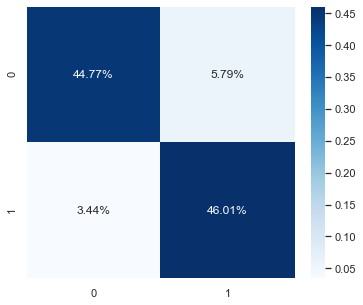

In [26]:
df_sm_result1 = model_helper.run_statsmodels_logit(spambase_balance, is_feature_selection=True, 
                    verbose=True)

In [27]:
df_sm_result1

,Accuracy,Precision,Recall,F1-Score
Score,0.907713,0.885559,0.928571,0.906555


#### Balance dataset but without feature selection

get_balance_data
Optimization terminated successfully.
         Current function value: 0.209908
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2843
Method:                           MLE   Df Model:                           56
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                  0.6972
Time:                        23:48:43   Log-Likelihood:                -608.73
converged:                       True   LL-Null:                       -2010.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7281      0.281     -2.594      0.009      -1.278      -0.178
x2         

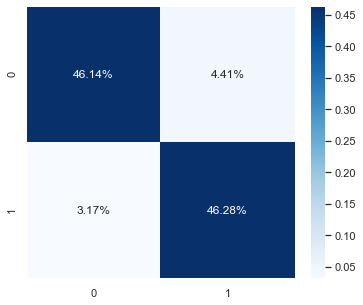

In [28]:
spambase_balance = loader.get_balance_dataset()

df_sm_result2 = model_helper.run_statsmodels_logit(spambase_balance, is_feature_selection=False,
                    verbose=True)

In [29]:
df_sm_result2

,Accuracy,Precision,Recall,F1-Score
Score,0.924242,0.912807,0.935754,0.924138


#### Full dataset and with feature selection

get_full_dataset
init Loader notebook
The shape before feature selection: (4601, 58)
The shape after feature selection: (4601, 37)
Optimization terminated successfully.
         Current function value: 0.241117
         Iterations 15
                            Logit Regression Results                           
Dep. Variable:     target_spam_nonspam   No. Observations:                 3680
Model:                           Logit   Df Residuals:                     3643
Method:                            MLE   Df Model:                           36
Date:                 Wed, 26 Jul 2023   Pseudo R-squ.:                  0.6406
Time:                         23:48:45   Log-Likelihood:                -887.31
converged:                        True   LL-Null:                       -2468.8
Covariance Type:             nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

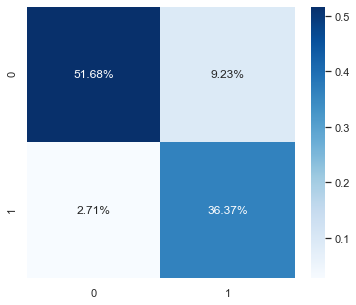

In [30]:
spambase_full = loader.get_full_dataset()

df_sm_result3 = model_helper.run_statsmodels_logit(spambase_full, is_feature_selection=True,
                    verbose=True)

In [31]:
df_sm_result3

,Accuracy,Precision,Recall,F1-Score
Score,0.880565,0.848485,0.9501,0.896422


#### Full dataset and without feature selection

get_full_dataset
         Current function value: 0.208535
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3680
Model:                          Logit   Df Residuals:                     3623
Method:                           MLE   Df Model:                           56
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                  0.6892
Time:                        23:48:46   Log-Likelihood:                -767.41
converged:                      False   LL-Null:                       -2468.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6947      0.244     -2.846      0.004      -1.173      -0.216
x2            -0.2399      0.072     -3.336     

D:\x-20a\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


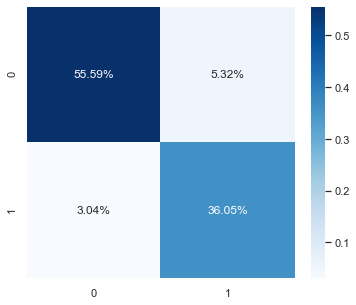

In [32]:
spambase_full = loader.get_full_dataset()

df_sm_result4 = model_helper.run_statsmodels_logit(spambase_full, is_feature_selection=False,
                        verbose=True)

In [33]:
df_sm_result4

,Accuracy,Precision,Recall,F1-Score
Score,0.916395,0.912656,0.948148,0.930064


### Sklearn

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

spambase_full = loader.get_full_dataset()

X = spambase_full.iloc[:,1:].values
y = spambase_full.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

# instantiate the model
sklearn_lr = LogisticRegression(max_iter=10000)

# fit the model using the training data
sklearn_lr.fit(X_train, y_train)

# use model to make predictions on test data
y_pred_sklearn = sklearn_lr.predict(X_test)

# calculate the accuracy, precision, recall and f1-score
acc = accuracy_score(y_test, y_pred_sklearn)
precision = precision_score(y_test, y_pred_sklearn)
recall = recall_score(y_test, y_pred_sklearn)
f1 = f1_score(y_test, y_pred_sklearn)

# print classification report for model
print(classification_report(y_test, y_pred_sklearn))

get_full_dataset
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       561
           1       0.92      0.90      0.91       360

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



In [35]:
sklearn_scores_df = pd.DataFrame([[acc, precision, recall, f1]],
        ['SkLearn full dataset without feature selection'], ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
sklearn_scores_df

,Accuracy,Precision,Recall,F1-Score
SkLearn full dataset without feature selection,0.93051,0.922857,0.897222,0.909859


#### Balance dataset with feature selection

In [36]:
spambase_balance = loader.get_balance_dataset()

df_sk_result1 = model_helper.run_sklearn_log_reg(spambase_balance, is_feature_selection=True)
df_sk_result1

get_balance_data
init Loader notebook
The shape before feature selection: (3626, 58)
The shape after feature selection: (3626, 37)


,Accuracy,Precision,Recall,F1-Score
Score,0.917355,0.938416,0.891365,0.914286


#### Balance dataset but without feature selection

In [37]:
spambase_balance = loader.get_balance_dataset()

df_sk_result2 = model_helper.run_sklearn_log_reg(spambase_balance, is_feature_selection=False)
df_sk_result2

get_balance_data


,Accuracy,Precision,Recall,F1-Score
Score,0.935262,0.948276,0.91922,0.933522


#### Full dataset and without feature selection

In [38]:
spambase_full = loader.get_full_dataset()

df_sk_result3 = model_helper.run_sklearn_log_reg(spambase_full, is_feature_selection=True)
df_sk_result3

get_full_dataset
init Loader notebook
The shape before feature selection: (4601, 58)
The shape after feature selection: (4601, 37)


,Accuracy,Precision,Recall,F1-Score
Score,0.927253,0.917379,0.894444,0.905767


#### Full dataset and without feature selection

In [39]:
spambase_full = loader.get_full_dataset()

df_sk_result4 = model_helper.run_sklearn_log_reg(spambase_full, is_feature_selection=False)
df_sk_result4

get_full_dataset


,Accuracy,Precision,Recall,F1-Score
Score,0.93051,0.922857,0.897222,0.909859


## Result

In [40]:
df_bal_sm_merged = pd.concat([df_sm_result1, df_sm_result2])

as_list = df_bal_sm_merged.index.tolist()

as_list[0] = 'Balance dataset with feature selection'
as_list[1] = 'Balance dataset without feature selection'
df_bal_sm_merged.index = as_list

In [41]:
df_full_sm_merged = pd.concat([df_sm_result3, df_sm_result4])

as_list = df_full_sm_merged.index.tolist()

as_list[0] = 'Full dataset with feature selection'
as_list[1] = 'Full dataset without feature selection'
df_full_sm_merged.index = as_list

### StatsModels

In [42]:
df_bal_sm_merged

,Accuracy,Precision,Recall,F1-Score
Balance dataset with feature selection,0.907713,0.885559,0.928571,0.906555
Balance dataset without feature selection,0.924242,0.912807,0.935754,0.924138


In [43]:
df_full_sm_merged

,Accuracy,Precision,Recall,F1-Score
Full dataset with feature selection,0.880565,0.848485,0.950100,0.896422
Full dataset without feature selection,0.916395,0.912656,0.948148,0.930064


In [44]:
df_sk_merged = pd.concat([df_sk_result1, df_sk_result2, df_sk_result3, df_sk_result4])

as_list = df_sk_merged.index.tolist()

as_list[0] = 'Balance dataset with feature selection'
as_list[1] = 'Balance dataset without feature selection'
as_list[2] = 'Full dataset with feature selection'
as_list[3] = 'Full dataset without feature selection'
df_sk_merged.index = as_list

### Sklearn

In [45]:
df_sk_merged

,Accuracy,Precision,Recall,F1-Score
Balance dataset with feature selection,0.917355,0.938416,0.891365,0.914286
Balance dataset without feature selection,0.935262,0.948276,0.919220,0.933522
Full dataset with feature selection,0.927253,0.917379,0.894444,0.905767
Full dataset without feature selection,0.930510,0.922857,0.897222,0.909859


## Conclusion